

1. Обучить, нейронную сеть на Keras на датасете MNIST.

In [1]:
!pip install scikeras[tensorflow]

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install mnist

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [5]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

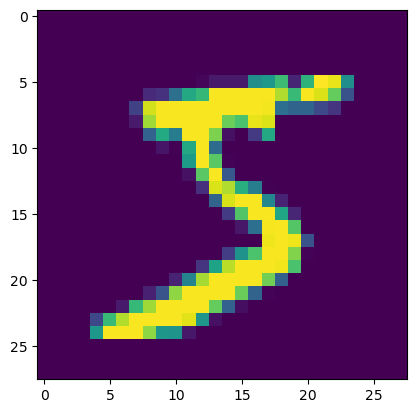

In [6]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255)
mnist.train_images()[0]/255
to_categorical(train_labels)
#train_labels

In [7]:
input_shape = (28, 28, 1)

In [8]:
model_1 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50),
    Dense(1)
    ] )

In [9]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


C:\Users\Иван\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 2s 822us/step - loss: 5.3095e-07 - accuracy: 0.0833
Epoch 2/5
1875/1875 [==============================] - 2s 834us/step - loss: 5.3095e-07 - accuracy: 0.0833
Epoch 3/5
1875/1875 [==============================] - 2s 846us/step - loss: 5.3095e-07 - accuracy: 0.0833
Epoch 4/5
1875/1875 [==============================] - 2s 811us/step - loss: 5.3095e-07 - accuracy: 0.0833
Epoch 5/5
1875/1875 [==============================] - 2s 863us/step - loss: 5.3095e-07 - accuracy: 0.0833
Wall time: 8.24 s


In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [14]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [15]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.2883 - accuracy: 0.9174
Epoch 2/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.1345 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 2s 881us/step - loss: 0.0931 - accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.0703 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 2s 949us/step - loss: 0.0561 - accuracy: 0.9833
Wall time: 8.87 s


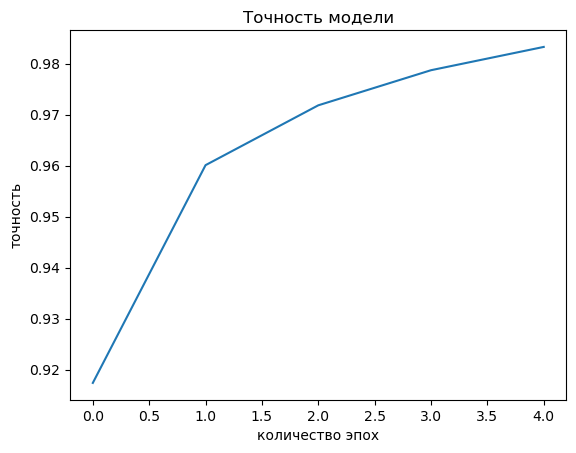

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

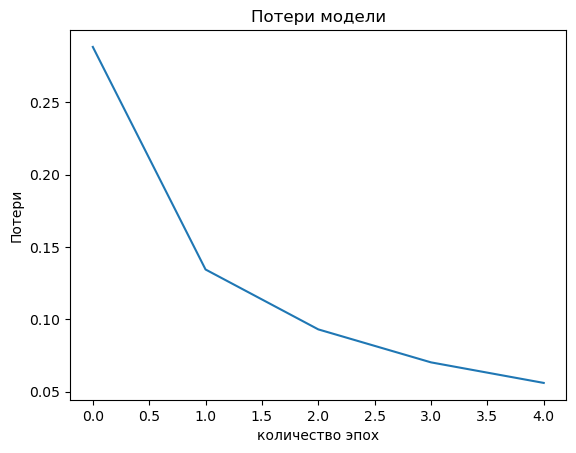

In [18]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [19]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 666us/step - loss: 0.0825 - accuracy: 0.9752


[0.08249950408935547, 0.9751999974250793]

In [20]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0842 - val_accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0857 - val_accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0913 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0853 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0835 - val_accuracy: 0.9759
Wall time: 9.91 s


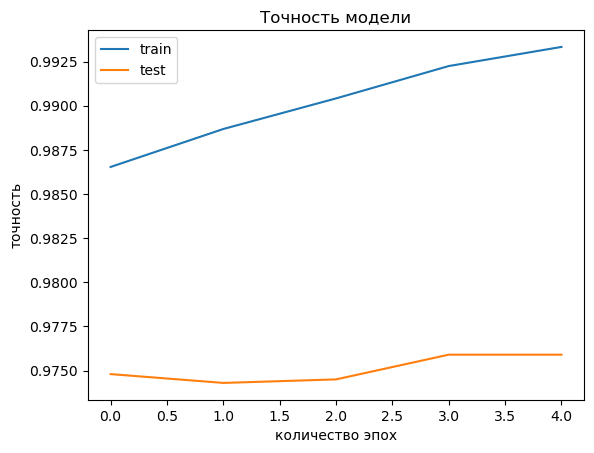

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

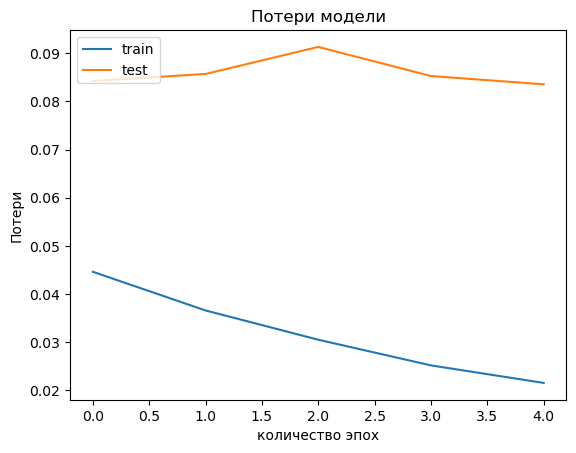

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

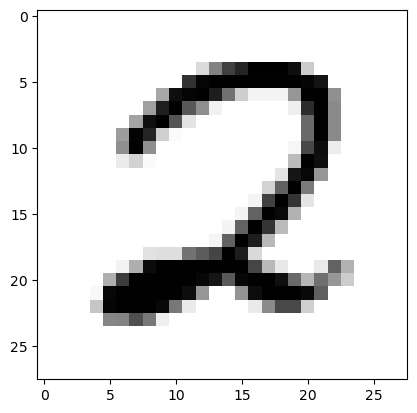

1/1 [==============================] - 0s 52ms/step
1: 2


In [23]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [24]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [25]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1875/1875 [==============================] - 2s 927us/step - loss: 0.2928 - accuracy: 0.9167
Epoch 2/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.1341 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.0994 - accuracy: 0.9691
Epoch 4/5
1875/1875 [==============================] - 2s 897us/step - loss: 0.0780 - accuracy: 0.9751
Epoch 5/5
313/313 [==============================] - 0s 684us/step - loss: 0.0890 - accuracy: 0.9714
**************
Loss - 0.09, Metrics - 0.971


In [26]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

1/1 [==============================] - 0s 23ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


### Picking params via GridSearchCV

In [27]:
batch_size = [ 500, 1000]
epochs = [5, 10]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [28]:
model = KerasClassifier(create_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/5
80/80 [==============================] - 1s 2ms/step - loss: 0.9064 - accuracy: 0.7500
Epoch 2/5
80/80 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.9105
Epoch 3/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9293
Epoch 4/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9395
Epoch 5/5
40/40 [==============================] - 0s 901us/step
Epoch 1/5
80/80 [==============================] - 1s 2ms/step - loss: 0.9769 - accuracy: 0.7139
Epoch 2/5
80/80 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.9155
Epoch 3/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9364
Epoch 4/5
80/80 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9462
Epoch 5/5
40/40 [==============================] - 0s 1ms/step
Epoch 1/5
80/80 [==============================] - 1s 2ms/step - loss: 0.9712 - accuracy: 0.7211

80/80 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9262
Epoch 4/10
80/80 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9367
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9449
Epoch 6/10
80/80 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9513
Epoch 7/10
80/80 [==============================] - 0s 2ms/step - loss: 0.1504 - accuracy: 0.9567
Epoch 8/10
80/80 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.9610
Epoch 9/10
80/80 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9644
Epoch 10/10
40/40 [==============================] - 0s 918us/step
Epoch 1/10
80/80 [==============================] - 1s 2ms/step - loss: 0.8899 - accuracy: 0.7580
Epoch 2/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.9148
Epoch 3/10
80/80 [==============================] - 0s 2ms/ste

40/40 [==============================] - 1s 4ms/step - loss: 1.3770 - accuracy: 0.6218
Epoch 2/5
40/40 [==============================] - 0s 4ms/step - loss: 0.4406 - accuracy: 0.8799
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.9127
Epoch 4/5
40/40 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.9280
Epoch 5/5
20/20 [==============================] - 0s 2ms/step
Epoch 1/5
40/40 [==============================] - 1s 4ms/step - loss: 1.4118 - accuracy: 0.6090
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.8705
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.9075
Epoch 4/5
40/40 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.9227
Epoch 5/5
20/20 [==============================] - 0s 2ms/step
Epoch 1/5
40/40 [==============================] - 1s 4ms/step - loss: 1.3915 - accuracy: 0.5926
Epoch 2/5
4

40/40 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.9214
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.9293
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2236 - accuracy: 0.9367
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2035 - accuracy: 0.9414
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1862 - accuracy: 0.9461
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.9506
Epoch 10/10
20/20 [==============================] - 0s 1ms/step
Epoch 1/10
40/40 [==============================] - 1s 4ms/step - loss: 1.3702 - accuracy: 0.6162
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.8747
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3188 - accuracy: 0.9115
Epoch 4/10
40/40 [==============================] - 0s 4ms/step 

In [29]:
print(grid_result.best_score_, grid_result.best_params_)

0.9581333333333334 {'batch_size': 500, 'epochs': 10, 'optimizer': 'Adam'}


In [30]:
df = pd.DataFrame(grid_result.cv_results_)

In [31]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
5,500,10,Adam,0.958133
4,500,10,RMSprop,0.957533
3,500,10,SGD,0.956267
11,1000,10,Adam,0.949650
9,1000,10,SGD,0.949133
10,1000,10,RMSprop,0.948333
0,500,5,SGD,0.946100
1,500,5,RMSprop,0.945567
2,500,5,Adam,0.944367
6,1000,5,SGD,0.932850


ДОМАШНЕЕ ЗАДАНИЕ


In [32]:
# меняю оптимизатор, добавляю слой с увеличенным числом нейронов

In [33]:

def my_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [34]:
print(model.summary())

AttributeError: 'KerasClassifier' object has no attribute 'summary'

In [ ]:
to_categorical(test_labels)

In [ ]:
model = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

# добавляю валидационную выборку, меняю параметры

In [ ]:
model_2 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=64, validation_split=0.3)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

In [ ]:
model_3 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

In [ ]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:20]}')

In [ ]:
batch_size = [70, 80, 90]
epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [ ]:
model = KerasClassifier(my_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

In [ ]:
print(grid_result.best_score_, grid_result.best_params_)

In [ ]:
df = pd.DataFrame(grid_result.cv_results_)

In [ ]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

# Вывод:
1 Введение дополнительного скрытого слоя улучшает показатель метрики.   
2 Умеренное увеличение количества эпох улучшает показатель метрики.   
3 Умеренное увеличение batch_size ускоряет обучение.      
4 Наличие валидационной выборки препятствует переобучению.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')